In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


In [65]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
#     plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [crew]')
    plt.legend()
    plt.grid(True)

In [66]:
df = pd.read_csv('data/cruise_ship_info.csv')

In [67]:
X = df[['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density']]
X_small = df[['Age', 'Tonnage', 'passengers', 'length', 'cabins']]
y = df['crew']
X.head()

,Age,Tonnage,passengers,length,cabins,passenger_density
0,6,30.277,6.94,5.94,3.55,42.64
1,6,30.277,6.94,5.94,3.55,42.64
2,26,47.262,14.86,7.22,7.43,31.80
3,11,110.000,29.74,9.53,14.88,36.99
4,17,101.353,26.42,8.92,13.21,38.36


In [68]:
train_features, test_features, train_target, test_target = train_test_split(X, y, random_state=42)

In [69]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))


In [70]:
lin_model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

lin_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error', metrics=['mae'])

# logdir = 'tf_logs/' + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

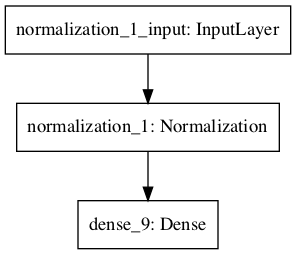

In [71]:
from keras.utils import plot_model

plot_model(lin_model)

In [72]:
%%time
history = lin_model.fit(
    train_features, train_target, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2) #,
    # callbacks=[tensorboard_callback])

CPU times: user 2.14 s, sys: 133 ms, total: 2.27 s
Wall time: 2.1 s


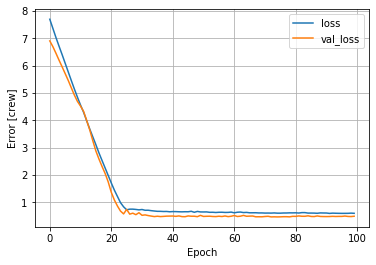

In [73]:
plot_loss(history)

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = lin_model.predict(test_features)
r2_score(test_target, y_pred)

0.9311545452589944

MAE:  0.7442467200756073


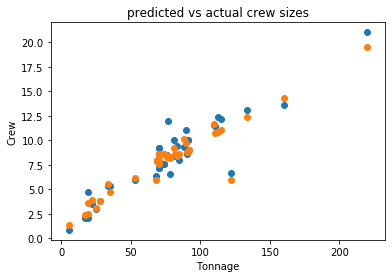

In [96]:
ax = plt.scatter(test_features.Tonnage,test_target)
ax = plt.scatter(test_features.Tonnage, y_pred)
plt.title('predicted vs actual crew sizes')
plt.ylabel('Crew')
plt.xlabel('Tonnage')
print('MAE: ', mean_absolute_error(test_target, y_pred))